In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('mote_locs.txt',sep=' ')

In [3]:
loc_array =df.to_numpy()

In [4]:
loc_array.T[2]

array([23., 20., 19., 15., 12., 12.,  8.,  4.,  2.,  5.,  3.,  1.,  5.,
        6.,  3.,  2.,  8., 10., 13., 17., 18., 23., 24., 30., 30., 31.,
       26., 31., 26., 31., 28., 31., 26., 30., 27., 31., 26., 31., 26.,
       28., 30., 30., 24., 22., 19., 16., 14., 10.,  6.,  1.,  4.,  6.,
        5.,  2.])

In [5]:
import matplotlib.pyplot as plt
from matplotlib import transforms

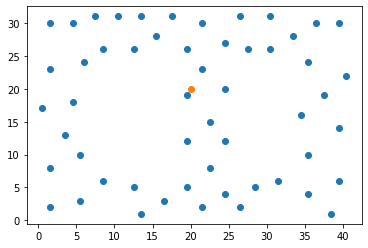

In [6]:
plt.scatter(loc_array.T[1],loc_array.T[2])
plt.scatter(20,20)

In [33]:
missing_id_list = [7, 21, 22, 23, 24, 26, 31, 36, 45, 46, 47, 48]

In [41]:
missing_where = []
for idd in missing_id_list:
    loc = np.where(loc_array.T[0] == idd)[0]
    missing_where.append(loc)
missing_where = np.array(missing_where)

In [27]:
np.where(loc_array.T[0] == 7)[0]

array([6])

In [42]:
sub_plot_x = loc_array.T[1][missing_where]
sub_plot_y = loc_array.T[2][missing_where]

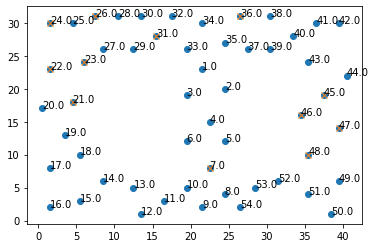

In [45]:
fig,ax = plt.subplots()
ax.plot(loc_array.T[1],loc_array.T[2],ls="",marker="o")
ax.plot(sub_plot_x,sub_plot_y,ls="",marker='x')
for xi,yi,idi in zip(loc_array.T[1],loc_array.T[2],loc_array.T[0]):
    ax.annotate(str(idi),xy=(xi,yi))

In [8]:
x = loc_array.T[1]
y = loc_array.T[2]
ids = loc_array.T[0]

In [9]:
x_max = np.max(loc_array.T[1])
x_min = np.min(loc_array.T[1])
y_max = np.max(loc_array.T[2])
y_min = np.min(loc_array.T[2])
print(x_max,x_min)
print(y_max,y_min)

40.5 0.5
31.0 1.0


In [10]:
new_x = -x+x_min+x_max
new_y = -y+y_min+y_max

In [11]:
num = 10
y_locs = np.linspace(y_min,y_max,num)
x_locs = np.linspace(x_min,x_max,num)

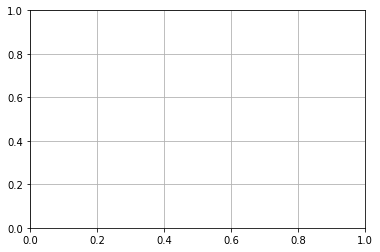

In [12]:
plt.grid()

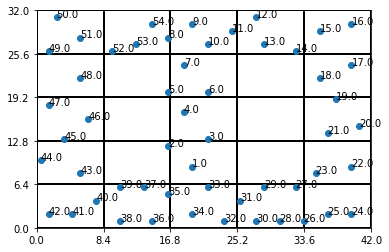

In [100]:
# divide whole map into 5*5 map
fig,ax = plt.subplots()

ax.set_xticks(np.linspace(x_min,x_max,6))
ax.set_yticks(np.linspace(y_min,y_max,6))
ax.axis(xmin=x_min,xmax=x_max,ymin=y_min,ymax=y_max)
# ax.set_xticks(np.arange(x_min,x_max,4))
# ax.grid(axis='both')
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.plot(new_x,new_y,ls="",marker="o")
for xi,yi,idi in zip(new_x,new_y,loc_array.T[0]):
    ax.annotate(str(idi),xy=(xi,yi))

In [99]:
# x_max = np.max(loc_array.T[1])
# x_min = np.min(loc_array.T[1])
# y_max = np.max(loc_array.T[2])
# y_min = np.min(loc_array.T[2])

x_min = 0
x_max = 42
y_min = 0
y_max = 32


x_range = np.linspace(x_min,x_max,6)
y_range = np.linspace(y_min,y_max,6)
x_locs = loc_array.T[1]
y_locs = loc_array.T[2]
ids = loc_array.T[0]

locs = []

for y_i in range(len(y_range)-1):
    for x_i in range(len(x_range)-1):
    
        sub_df = df[(df['x_location'] >= x_range[x_i]) & (df['x_location'] < x_range[x_i+1]) & (df['y_location'] >= y_range[y_i]) & (df['y_location'] < y_range[y_i+1])]
        locs.append(sub_df['moteid'].values.tolist())
# locs = np.array(locs)
print(x_range)
print(y_range)
print(x_locs)
print(y_locs)
print(ids)

[ 0.   8.4 16.8 25.2 33.6 42. ]
[ 0.   6.4 12.8 19.2 25.6 32. ]
[21.5 24.5 19.5 22.5 24.5 19.5 22.5 24.5 21.5 19.5 16.5 13.5 12.5  8.5
  5.5  1.5  1.5  5.5  3.5  0.5  4.5  1.5  6.   1.5  4.5  7.5  8.5 10.5
 12.5 13.5 15.5 17.5 19.5 21.5 24.5 26.5 27.5 30.5 30.5 33.5 36.5 39.5
 35.5 40.5 37.5 34.5 39.5 35.5 39.5 38.5 35.5 31.5 28.5 26.5]
[23. 20. 19. 15. 12. 12.  8.  4.  2.  5.  3.  1.  5.  6.  3.  2.  8. 10.
 13. 17. 18. 23. 24. 30. 30. 31. 26. 31. 26. 31. 28. 31. 26. 30. 27. 31.
 26. 31. 26. 28. 30. 30. 24. 22. 19. 16. 14. 10.  6.  1.  4.  6.  5.  2.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.]


In [98]:
print(x_min,x_max)
print(y_min,y_max)

0.5 40.5
1.0 31.0


In [101]:
locs

[[15, 16],
 [11, 12, 13, 14],
 [8, 9, 10],
 [52, 53, 54],
 [49, 50, 51],
 [17, 18],
 [],
 [5, 6, 7],
 [],
 [48],
 [19, 20, 21],
 [],
 [3, 4],
 [],
 [45, 46, 47],
 [22, 23],
 [],
 [1, 2],
 [],
 [43, 44],
 [24, 25, 26],
 [27, 28, 29, 30, 31],
 [32, 33, 34, 35],
 [36, 37, 38, 39, 40],
 [41, 42]]

In [103]:
sums = 0
for item in locs:
    sums += len(item)
print(sums)

54


In [89]:
for item in locs:
    print(item.tolist())

[15, 16]
[12, 13, 14]
[9, 10, 11]
[8, 52, 53, 54]
[49, 50, 51]
[17, 18]
[]
[6, 7]
[5]
[48]
[19, 20, 21]
[]
[4]
[]
[46, 47]
[22, 23]
[]
[1, 3]
[2]
[43, 45]
[24, 25]
[27, 29, 31]
[33, 34]
[35, 37, 39]
[40, 41, 42]


In [66]:
df[(df['x_location'] >= x_range[0]) & (df['x_location'] < x_range[1]) & (df['y_location'] >= y_range[0]) & (df['y_location'] < y_range[1])]

,moteid,x_location,y_location
14,15,5.5,3
15,16,1.5,2


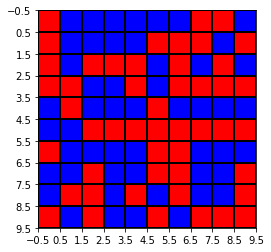

In [14]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));
# ax.set_xticks(np.arange(0,10,1))
# ax.set_yticks(np.arange(0,10,1))


plt.show()

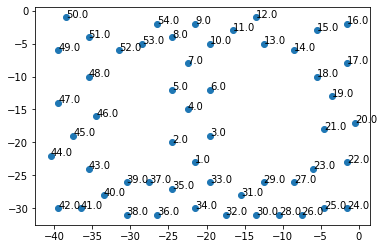

In [15]:
fig,ax = plt.subplots()
ax.plot(-loc_array.T[1],-loc_array.T[2],ls="",marker="o")
for xi,yi,idi in zip(loc_array.T[1],loc_array.T[2],loc_array.T[0]):
    ax.annotate(str(idi),xy=(-xi,-yi))

In [16]:
rot = transforms.Affine2D().rotate_deg(90)

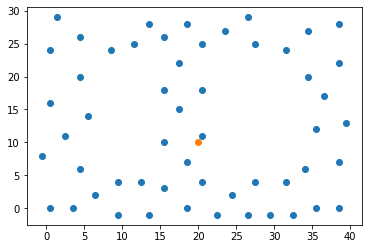

In [17]:
plt.scatter(-loc_array.T[1]+40,-loc_array.T[2]+30)
plt.scatter(20,10)